# Project: Data Analysis with the IBM Automobile Dataset

In [97]:
!pip install pandas
!pip install numpy

## Data Acquisition

Reading the dataset from the URL and adding the related headers

In [98]:
import pandas as pd # for data manipulation and analysis.
import numpy as np  # for numerical computations.
import matplotlib.pyplot as plt # for creating plots and visualizations.
import seaborn as sns #  for data visualization based on Matplotlib.
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats # for statistical analysis.
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
# imports the PolynomialFeatures class from scikit-learn's preprocessing module. 
# This class is used to generate polynomial and interaction features from a given dataset
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline # the Pipeline class for creating a processing pipeline.
from sklearn.preprocessing import StandardScaler # for data scaling.
from sklearn.model_selection import cross_val_score # for model evaluation.
from sklearn.model_selection import cross_val_predict # for model evaluation.
from ipywidgets import interact, interactive, fixed, interact_manual # for creating interactive widgets.
import ipywidgets as widgets
from tqdm import tqdm # for creating progress bars during loops.( une idée visuelle de l'avancement du processus.)
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

In [99]:
#load the dataset : the Automobile Dataset is an online source
#Data source: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

url= "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df= pd.read_csv(url, header=None)
#the data does not include headers, we can add an argument headers = None
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
31,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645
161,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400
93,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349


In [100]:
#Create headers 

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
22,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
71,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
136,3,150,saab,gas,turbo,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18150
124,3,?,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764
134,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040


## Data Wrangling

## Preprocess the data

Identify and handle missing values

In [101]:
#replace the "?" symbol with NaN
df_auto=df.replace("?", np.NaN)
df_auto.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
89,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
86,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
167,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565


In [102]:
#Check the data for any missing values 
df_auto.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [103]:
df_auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [104]:
#Explore the dataset to obtain essential insights of the data
df_auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [105]:
# Deal with missing data
#"normalized-losses","stroke","bore","horsepower","peak-rpm" replace them with mean
#"num-of-doors"replace them with "four": Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
#"price"delete the whole row
mean_norm_losses=df_auto["normalized-losses"].astype("float").mean(axis=0)
df_auto["normalized-losses"].replace(np.nan, mean_norm_losses, inplace=True)

mean_stroke=df_auto["stroke"].astype("float").mean(axis=0)
df_auto["stroke"].replace(np.nan, mean_stroke, inplace=True)

mean_bore=df_auto["bore"].astype("float").mean(axis=0)
df_auto["bore"].replace(np.nan, mean_bore, inplace=True)

mean_horsepower=df_auto["horsepower"].astype("float").mean(axis=0)
df_auto["horsepower"].replace(np.nan, mean_horsepower, inplace=True)

mean_peak_rpm=df_auto["peak-rpm"].astype("float").mean(axis=0)
df_auto["peak-rpm"].replace(np.nan, mean_peak_rpm, inplace=True)


In [106]:
max_num=df_auto["num-of-doors"].value_counts().idxmax()
max_num

'four'

In [107]:
df_auto["num-of-doors"].replace(np.nan, max_num, inplace = True) 

In [108]:
#drop whole row with NaN in "price" column
df_auto.dropna(subset=["price"], axis=0, inplace=True) #Setting the argument “inplace” to “true” allows the modification to be done on the df directly
df_auto.reset_index(drop=True, inplace=True)
df_auto.sample(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
41,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
172,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
164,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
178,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
108,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580
72,1,122.0,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
99,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
103,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399


In [109]:
#we have a dataset with no missing values.
df_auto.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [110]:
df_auto.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 201, dtype: bool

In [111]:
df_auto.drop_duplicates(inplace=True)
df_auto.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
117,1,154,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
120,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
146,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
105,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
26,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
147,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338
122,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,10945
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
72,1,122.0,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503


In [112]:
#Save the dataframe df as automobile.csv
df_auto.to_csv("automobile.csv", index=False)

In [113]:
df_auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [114]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [115]:
#Convert data types to proper format
df_auto["normalized-losses"]=df_auto["normalized-losses"].astype("int")

df_auto["stroke"]= df_auto["stroke"].astype("float")
df_auto["bore"]= df_auto["bore"].astype("float")
df_auto["horsepower"]= df_auto["horsepower"].astype("float")
df_auto["peak-rpm"]= df_auto["peak-rpm"].astype("float")
df_auto["price"]= df_auto["price"].astype("float")

In [116]:
df_auto.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [117]:
# Data Standardization
# Transforming data into a common format
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

df_auto["city-mpg"]=235/df_auto["city-mpg"]
df_auto.rename(columns={"city-mpg":"city_L/100km"}, inplace=True)
df_auto["highway_L/100km"]=235/df_auto["highway-mpg"]
#df_auto.rename(columns={"highway-mpg":"highway_L/100km"}, inplace=True)
df_auto.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km
50,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,2bbl,3.03,3.15,9.00,68.0,5000.0,7.580645,38,6695.0,6.184211
179,2,122,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,mpfi,3.19,3.40,9.00,85.0,5250.0,8.703704,34,7975.0,6.911765
38,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,1bbl,3.15,3.58,9.00,86.0,5800.0,8.703704,33,8845.0,7.121212
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.50,114.0,5400.0,12.368421,25,22625.0,9.400000
92,1,128,nissan,gas,std,two,hatchback,fwd,front,94.5,...,2bbl,3.15,3.29,9.40,69.0,5200.0,7.580645,37,7799.0,6.351351
19,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,2bbl,3.03,3.11,9.60,70.0,5400.0,6.184211,43,6575.0,5.465116
83,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,2bbl,3.35,3.46,8.50,88.0,5000.0,9.400000,32,8189.0,7.343750
20,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.41,68.0,5500.0,6.351351,41,5572.0,5.731707
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,12.368421,26,16500.0,9.038462
64,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.50,123.0,4350.0,10.681818,25,25552.0,9.400000


In [118]:
# Data Normalization
# scaling the variable so the variable values range from 0 to 1
df_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city_L/100km',
       'highway-mpg', 'price', 'highway_L/100km'],
      dtype='object')

In [119]:
df_auto['length'] = df_auto['length']/df_auto['length'].max()
df_auto['width'] = df_auto['width']/df_auto['width'].max()
df_auto['height'] = df_auto['height']/df_auto['height'].max()
# we've normalized "length", "width" and "height" in the range of [0,1]

In [120]:
# Binning
# transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

df_auto['horsepower']=df_auto['horsepower'].astype('int')

Text(0.5, 1.0, 'Horsepower bins')

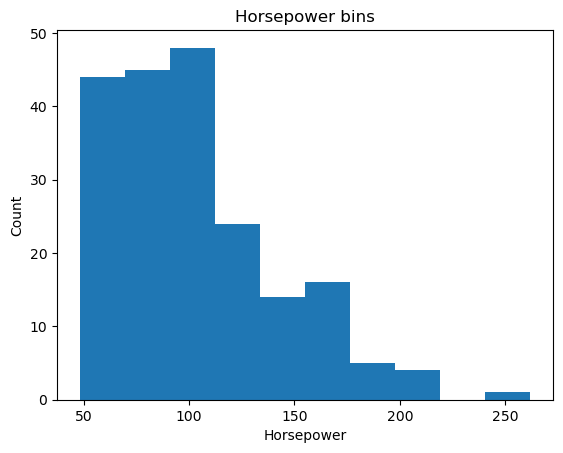

In [121]:
# Plot the histogram of horsepower to analyse the distribution
plt.hist(df_auto['horsepower'])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower bins")

In [122]:
# Define the bin edges and labels then apply the function "cut" to determine what each value of df['horsepower'] belongs to.
bins=[-float("inf"), 75, 125, float("inf")] #-float("inf"): This represents negative infinity / float("inf"): This represents positive infinity
df_auto['horsepower-binned'] = pd.cut(df_auto['horsepower'], bins, labels=["Low", "Medium", "High"])
df_auto[["horsepower-binned","horsepower"]].sample(10)

,horsepower-binned,horsepower
47,Low,68
192,Medium,114
188,Low,68
25,Low,68
38,Medium,86
55,High,135
175,High,161
89,Low,69
32,Medium,76
164,Medium,116


In [123]:
#The distribution of each bin
print(df_auto['horsepower-binned'].dtypes)

category


Text(0.5, 1.0, 'The distribution of each bin')

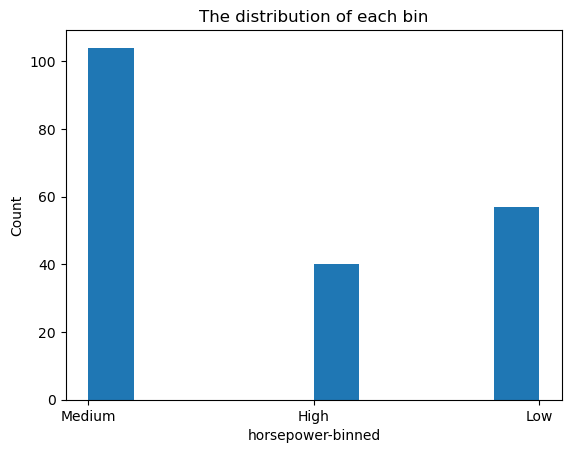

In [124]:

df_auto['horsepower-binned']=df_auto['horsepower-binned'].astype('str')
plt.hist(df_auto['horsepower-binned'])
plt.xlabel('horsepower-binned')
plt.ylabel('Count')
plt.title('The distribution of each bin')

In [125]:
# Indicator Variable (or Dummy Variable) :
# We use indicator variables so we can use categorical variables for regression analysis in the later modules.

df_auto['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [126]:
df_auto['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [127]:
dummies_variables = pd.get_dummies(df_auto[['fuel-type','aspiration']])
dummies_variables

,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
196,0,1,1,0
197,0,1,0,1
198,0,1,1,0
199,1,0,0,1


In [128]:
dummies_variables.rename(columns={"diesel":"fuel-type-diesel","gas":"fuel-type-gas"}, inplace=True)

In [129]:
df_auto=pd.concat([df_auto,dummies_variables] , axis=1)
df_auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,11.190476,27,13495.0,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,11.190476,27,16500.0,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,12.368421,26,16500.0,9.038462,High,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,9.791667,30,13950.0,7.833333,Medium,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,13.055556,22,17450.0,10.681818,Medium,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,5400.0,10.217391,28,16845.0,8.392857,Medium,0,1,1,0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,5300.0,12.368421,25,19045.0,9.400000,High,0,1,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,5500.0,13.055556,23,21485.0,10.217391,High,0,1,1,0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,4800.0,9.038462,27,22470.0,8.703704,Medium,1,0,0,1


In [130]:
df_auto.drop(["fuel-type","aspiration"], axis=1, inplace=True)

In [131]:
#The last two columns are now the indicator variable representation of the fuel-type variable.
df_auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,11.190476,27,13495.0,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,11.190476,27,16500.0,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,12.368421,26,16500.0,9.038462,High,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,9.791667,30,13950.0,7.833333,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,13.055556,22,17450.0,10.681818,Medium,0,1,1,0


In [132]:
df_auto.to_csv('clean_df_auto.csv')

## Exploratory Data Analysis

In [133]:
df_auto.head(15)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,11.190476,27,13495.0,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,11.190476,27,16500.0,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,12.368421,26,16500.0,9.038462,High,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,9.791667,30,13950.0,7.833333,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,13.055556,22,17450.0,10.681818,Medium,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,12.368421,25,15250.0,9.400000,Medium,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,12.368421,25,17710.0,9.400000,Medium,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,12.368421,25,18920.0,9.400000,Medium,0,1,1,0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,13.823529,20,23875.0,11.750000,High,0,1,0,1
9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,10.217391,29,16430.0,8.103448,Medium,0,1,1,0


In [134]:
# understand what type of variable you are dealing with to find the right visualization method for that variable.
# list the data types for each column
df_auto.dtypes

symboling              int64
normalized-losses      int32
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city_L/100km         float64
highway-mpg            int64
price                float64
highway_L/100km      float64
horsepower-binned     object
fuel-type_diesel       uint8
fuel-type_gas          uint8
aspiration_std         uint8
aspiration_turbo       uint8
dtype: object

In [135]:
df_auto['peak-rpm'].dtypes

dtype('float64')

In [136]:
# calculate the correlation between variables using the method "corr":
df_auto.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\3767869660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_auto.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,0.066171,0.036233,-0.082391,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,0.238567,-0.181877,0.133999,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,0.476153,-0.543304,0.584642,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,0.657373,-0.698142,0.690628,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,0.673363,-0.680635,0.751265,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,0.003811,-0.104812,0.135486,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,0.785353,-0.794889,0.834415,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,0.745059,-0.679571,0.872335,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,0.554610,-0.591309,0.543155,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,0.036133,-0.034636,0.082269,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [137]:
df_auto[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


In [138]:
# Continuous Numerical Variables
# Positive Linear Relationship

df_auto['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

Text(0.5, 1.0, 'scatterplot with a regression line')

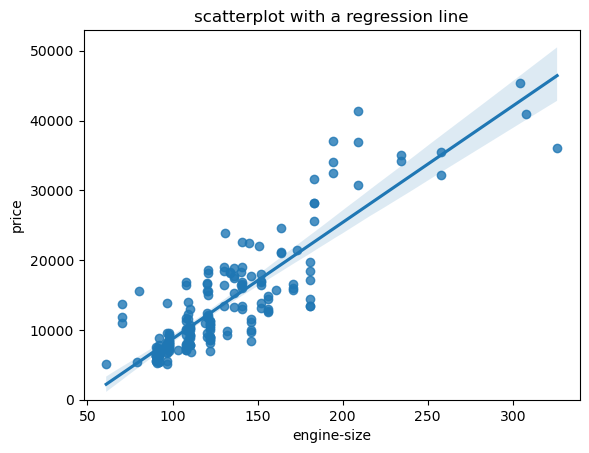

In [139]:
# scatterplot with a regression line, showing how engine size relates to the price of the vehicles in the df_auto dataset

sns.regplot(x='engine-size', y='price', data=df_auto)
plt.ylim(0) # y-axis starts from 0
plt.title('scatterplot with a regression line')

In [140]:
df_auto[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [141]:
df_auto['highway-mpg']

0      27
1      27
2      26
3      30
4      22
       ..
196    28
197    25
198    23
199    27
200    25
Name: highway-mpg, Length: 201, dtype: int64

In [142]:
df_auto['highway_L/100km']

0       8.703704
1       8.703704
2       9.038462
3       7.833333
4      10.681818
         ...    
196     8.392857
197     9.400000
198    10.217391
199     8.703704
200     9.400000
Name: highway_L/100km, Length: 201, dtype: float64

Text(0.5, 1.0, 'scatterplot with a regression line')

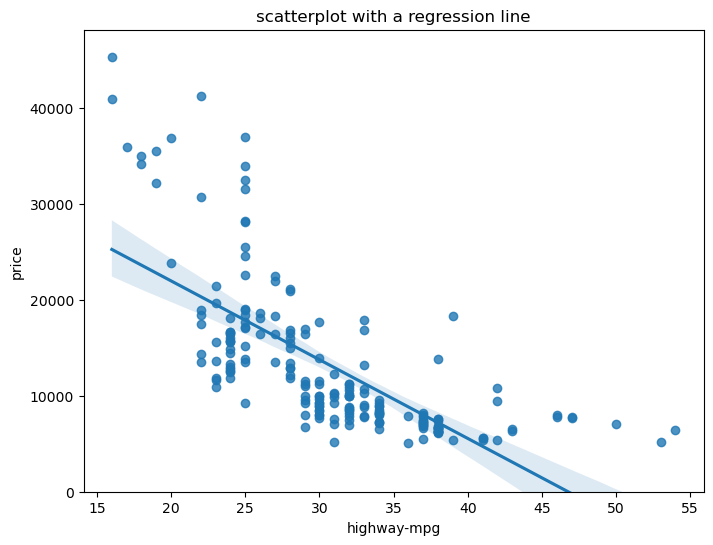

In [143]:
# scatterplot with a regression line, showing how highway-mpg relates to the price of the vehicles 
width=8
height=6
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df_auto)
plt.ylim(0) # y-axis starts from 0
plt.title('scatterplot with a regression line')

In [144]:
df_auto[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [145]:
# Weak Linear Relationship
df_auto['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
196    5400.0
197    5300.0
198    5500.0
199    4800.0
200    5400.0
Name: peak-rpm, Length: 201, dtype: float64

Text(0.5, 1.0, 'scatterplot with a regression line')

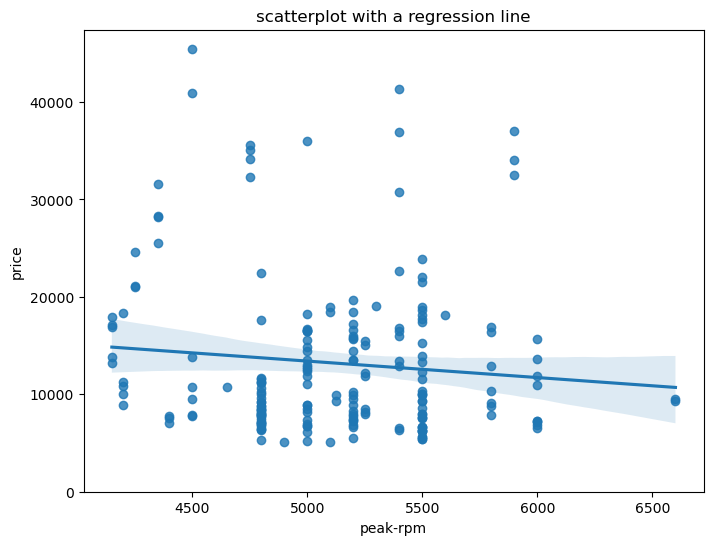

In [146]:
width=8
height=6
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df_auto)
plt.ylim(0) # y-axis starts from 0
plt.title('scatterplot with a regression line')

In [147]:
df_auto[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='body-style', ylabel='price'>

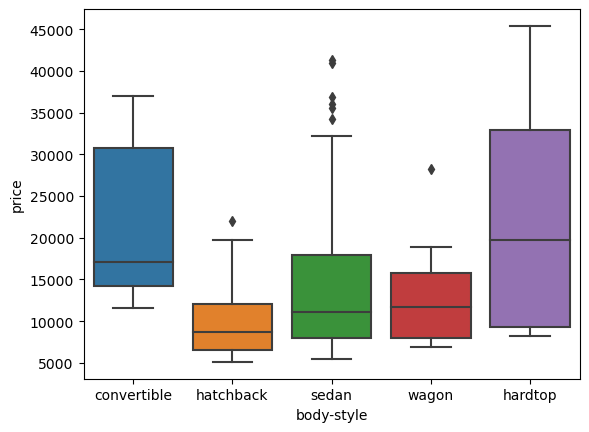

In [148]:
# Categorical Variables
# The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.
# Relationship between "body-style" and "price"

sns.boxplot(x='body-style', y='price', data=df_auto)

<Axes: xlabel='engine-location', ylabel='price'>

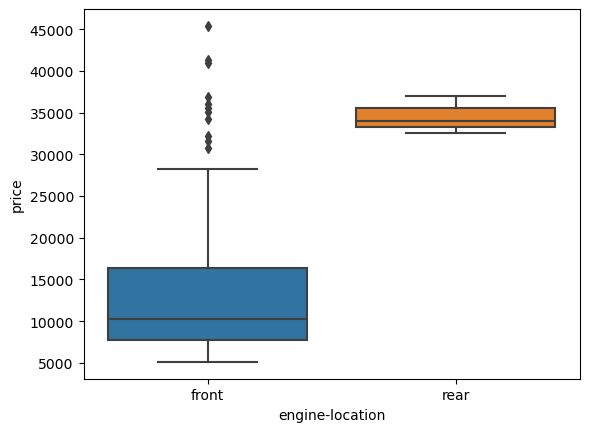

In [149]:
sns.boxplot(x='engine-location', y='price', data=df_auto)

<Axes: xlabel='drive-wheels', ylabel='price'>

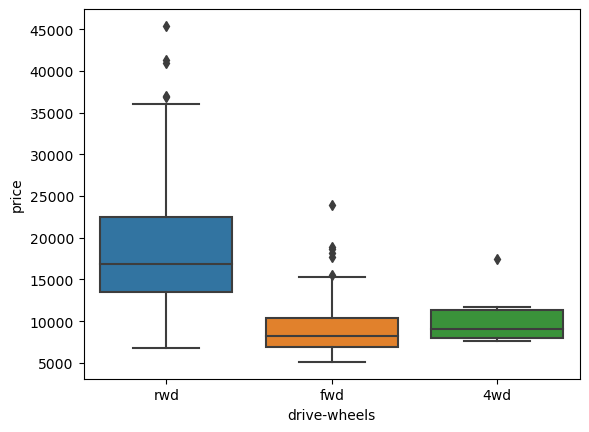

In [150]:
sns.boxplot(x="drive-wheels", y="price", data=df_auto)

In [151]:
# Descriptive Statistical Analysis
df_auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city_L/100km,highway-mpg,price,highway_L/100km,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,9.944145,30.686567,13207.129353,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,2.534599,6.815150,7947.066342,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,4.795918,16.000000,5118.000000,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,7.833333,25.000000,7775.000000,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,9.791667,30.000000,10295.000000,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,12.368421,34.000000,16500.000000,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,18.076923,54.000000,45400.000000,14.687500,1.000000,1.000000,1.000000,1.000000


In [152]:
df_auto.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Medium
freq,32,115,94,118,198,145,157,92,104


In [153]:
# drive_wheels as variable
drive_wheels_counts = df_auto['drive-wheels'].value_counts()
drive_wheels_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [154]:
drive_wheels_counts = df_auto['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [155]:
# engine-location as variable
engine_loc_counts = df_auto['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


In [156]:
# Calculate the average price for each of the different categories of drive-wheels .
df_group_one = df_auto[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [157]:
df_groupby_drive_wheels = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_groupby_drive_wheels

C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\2647507446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby_drive_wheels = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [158]:
# Calculate the average price for each of the different categories of drive-wheels and body-style.

df_groupby_drive_wheels_body_style = df_group_one.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_groupby_drive_wheels_body_style

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [159]:
# This grouped data is much easier to visualize when it is made into a pivot table. 
grouped_pivot = df_groupby_drive_wheels_body_style.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [160]:
grouped_pivot.fillna(0,inplace=True)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

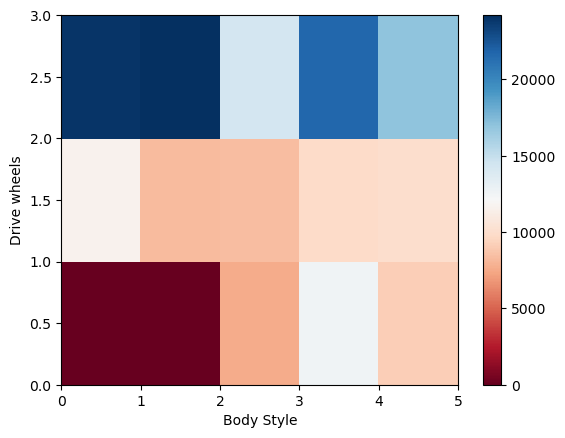

In [161]:
# Let's use a heat map to visualize the relationship between Drive wheels, Body Style vs Price.
#use the grouped results

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.ylabel('Drive wheels')
plt.xlabel('Body Style')
plt.show()

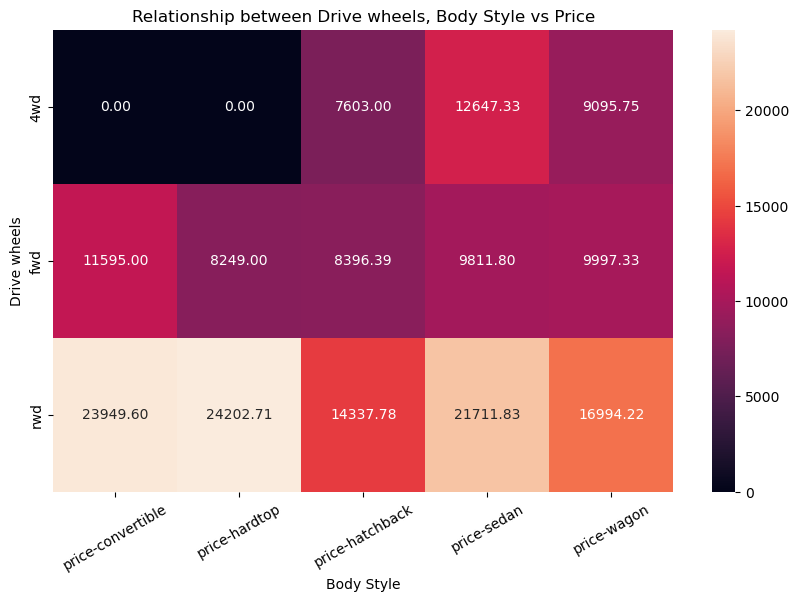

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(grouped_pivot, annot= True, fmt= '.2f', cbar= True) 
plt.title('Relationship between Drive wheels, Body Style vs Price')
plt.xlabel('Body Style')
plt.ylabel('Drive wheels')
plt.xticks(rotation=30)
plt.show()

In [163]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
df_auto[['wheel-base','price']].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


In [164]:
pearson_coef, p_value= stats.pearsonr(df_auto['wheel-base'], df_auto['price'])
print(f"Pearson value : {pearson_coef}, P-value : { p_value}")

Pearson value : 0.5846418222655081, P-value : 8.076488270732885e-20


In [165]:
# Let's calculate the F-test score and P-value of 'wheel-base' and 'price'.
df_groupby_drive_wheels_body_style
# The .get_group method is not used with DataFrames; it's used with GroupBy objects.
df_groupby_drive_wheels = df_groupby_drive_wheels_body_style[['drive-wheels','price']].groupby(['drive-wheels'])

In [166]:
# Perform the ANOVA test on the 'price' column
f_test, p_value = stats.f_oneway(
    df_groupby_drive_wheels.get_group('4wd')['price'],
    df_groupby_drive_wheels.get_group('fwd')['price'],
    df_groupby_drive_wheels.get_group('rwd')['price']
)

print(f"F-test: {f_test:.2f}, P-value: {p_value:.4f}")

F-test: 17.54, P-value: 0.0005


## Model Development

Develop prediction models

Linear Regression and Multiple Linear Regression

In [167]:
# Create the linear regression object

lr=LinearRegression()
lr

LinearRegression()

In [168]:
df_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city_L/100km', 'highway-mpg', 'price',
       'highway_L/100km', 'horsepower-binned', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo'],
      dtype='object')

In [169]:
# we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable
x=df_auto[['highway-mpg']] # x is a df
y=df_auto['price'] # y is a series

In [170]:
# Fit the linear model using highway-mpg
lr.fit(x,y)

LinearRegression()

In [171]:
x

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
196,28
197,25
198,23
199,27


In [172]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [173]:
y_pred=lr.predict(x)
y_pred

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [174]:
y_pred[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [175]:
a=lr.intercept_
a

38423.305858157386

In [176]:
#slope
b=lr.coef_ 
b

array([-821.73337832])

In [177]:
y=df_auto['price']
z=df_auto[['horsepower','curb-weight','engine-size','highway-mpg']]
z

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22
...,...,...,...,...
196,114,2952,141,28
197,160,3049,141,25
198,134,3012,173,23
199,106,3217,145,27


In [178]:
lr.fit(z,y)

LinearRegression()

In [179]:
y_pred_z=lr.predict(z)
y_pred_z

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021, 10722.47987021, 17804.67839001,
       18063.62127923, 19320.4783358 , 26969.32926712, 27675.53714681,
       28191.72492822,   651.8979531 ,  5649.14852473,  5813.93036332,
        5479.18538861,  5370.70721111,  8739.99146436,  5799.13999145,
        5902.71714714,  5902.71714714,  9036.59877384, 11863.05285278,
       18768.17719927,  4809.56824779,  5693.61564163,  4006.84810707,
        6118.6524279 ,  6193.98126841,  6448.2161051 ,  6514.12884053,
        9478.60926656,  9728.13605072,  9798.75683869, 10118.90441082,
       11178.90975501, 10424.07266905,  9462.75597759, 12626.31797001,
       34469.72884008, 34469.72884008, 43997.74598077,  5265.01699909,
        5565.21327191,  5588.75353457,  5777.07563582,  5800.61589848,
        7337.41632504,  7337.41632504,  7360.95658769, 10537.5383843 ,
      

In [180]:
a=lr.intercept_
a

-15811.863767729243

In [181]:
b=lr.coef_
b

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

<Axes: xlabel='highway-mpg', ylabel='price'>

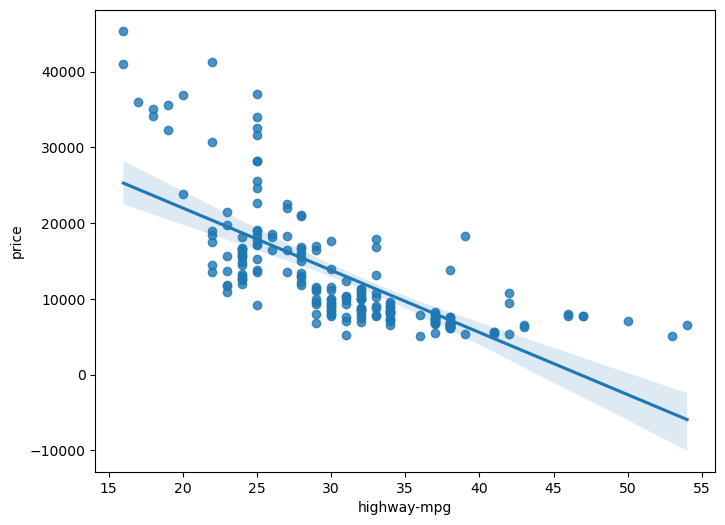

In [182]:
# Model Evaluation Using Visualization
# Regression Plot

# When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
width=8
height=6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df_auto)

In [183]:
df_auto[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

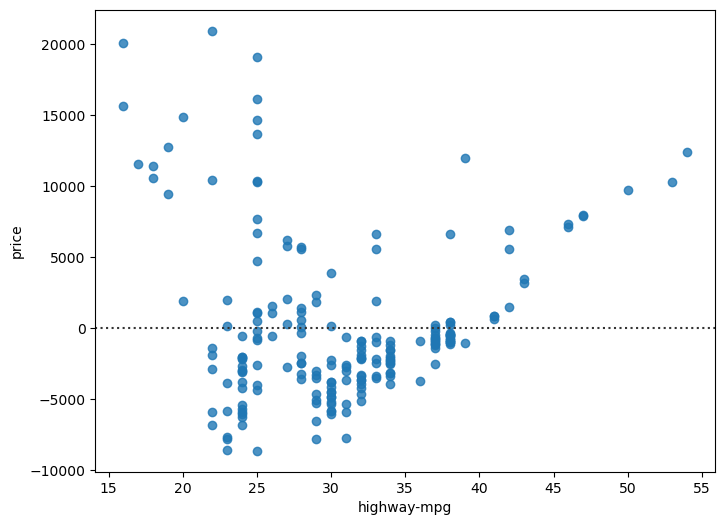

In [184]:
width=8
height=6
plt.figure(figsize=(width, height))
sns.residplot(x=df_auto['highway-mpg'],y=df_auto['price'])


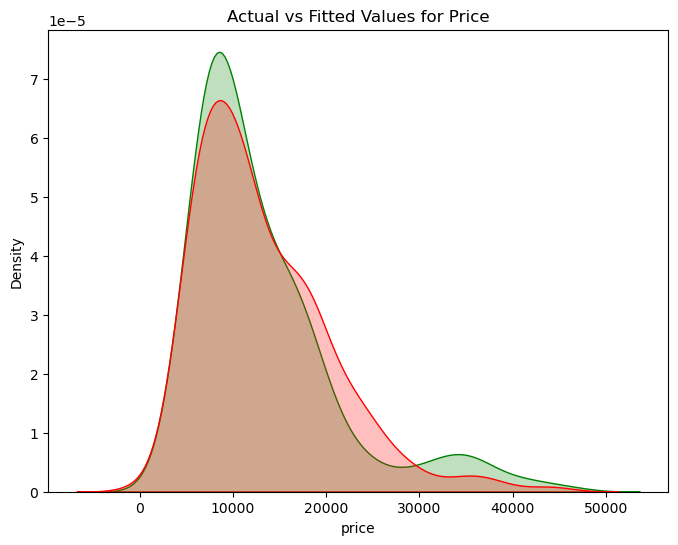

In [185]:
# Distribution
# To visualize a model for Multiple Linear Regression.

width=8
height=6
plt.figure(figsize=(width,height))
sns.kdeplot(y, color='green', label='Actual values', fill=True)
sns.kdeplot(y_pred_z,color='red', label='Fitted value', fill=True)  
# Set the title and labels
plt.title('Actual vs Fitted Values for Price')
#plt.xlabel('Price (in dollars)')
#plt.ylabel('Proportion of Cars')
# Display the plot
plt.show()

In [186]:
# Fonction to plot polynomial fits for a model ; function takes a polynomial regression model, along with independent x and 
# dependent variables y, and creates a plot that shows the original data points as dots and the polynomial fit curve as a line. 
# Name: This is a string that will be used as the x-axis label in the plot.
def polyplot(model,  independent_variable, dependent_variable, description):
    
    # Generate New Data Points:
    # a range of 100 evenly spaced values between 15 and 55 for the independent variable (x_new).
    x_new=np.linspace(15,55,100) 
    y_new=model(x_new)
    
    # Plot the Data:
    # Plots the original data points as dots. It uses the independent_variable and dependent_variable provided as input.
    # Then plots the polynomial fit curve (y_new) against the x_new values. 
    # The '-' argument specifies that the line should be drawn as a continuous line.
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    
    #Styling and Labels:
    plt.title(f'Polynomial Fit with Matplotlib for {description} vs Price')
    # gets the current axes (plot) object.
    ax=plt.gca()
    # sets the background color of the plot.
    ax.set_facecolor((0.850, 0.850, 0.850))
    fig=plt.gcf()
    plt.xlabel(description)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()
    

In [187]:
X = df_auto['highway-mpg']
y = df_auto['price']

In [188]:
f= np.polyfit(X, y , 3) # fit the polynomial / f : an array of coefficients representing the polynomial

# A polynomial function p based on the coefficients in f. 
# You can then use this p function to evaluate the polynomial at specific values of x, like p(x).
p= np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


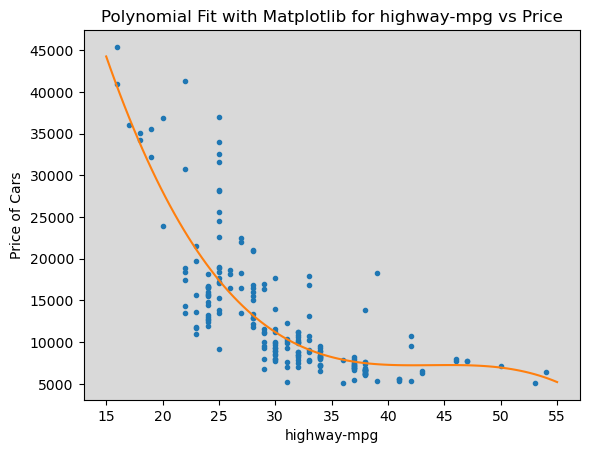

In [189]:
polyplot(p,x,y,'highway-mpg') 

In [190]:

#create an instance of the PolynomialFeatures class and specify that you want to generate polynomial features of degree 2.
pf=PolynomialFeatures(degree=2)
pf

PolynomialFeatures()

In [191]:
# applies the polynomial transformation to your feature matrix Z.
# z=df_auto[['horsepower','curb-weight','engine-size','highway-mpg']]
pf_z=pf.fit_transform(z)
pf_z

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [192]:
z.shape

(201, 4)

In [193]:
# After the transformation, there are 201 samples and 15 features.
pf_z.shape

(201, 15)

In [236]:
# create the pipeline by creating a list of tuples
Input=[('scale',StandardScaler()), ('model',LinearRegression())]


[('scale', StandardScaler()), ('model', LinearRegression())]

In [195]:
# We input the list as an argument to the pipeline constructor
# The pipeline takes care of all necessary data preprocessing steps before fitting the model.
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [196]:
z.dtypes

horsepower     int32
curb-weight    int64
engine-size    int64
highway-mpg    int64
dtype: object

In [197]:
z= z.astype(float) # convert the data type z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [198]:
ypipe=pipe.predict(z)
ypipe

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021, 10722.47987021, 17804.67839001,
       18063.62127923, 19320.4783358 , 26969.32926712, 27675.53714681,
       28191.72492822,   651.8979531 ,  5649.14852473,  5813.93036332,
        5479.18538861,  5370.70721111,  8739.99146436,  5799.13999145,
        5902.71714714,  5902.71714714,  9036.59877384, 11863.05285278,
       18768.17719927,  4809.56824779,  5693.61564163,  4006.84810707,
        6118.6524279 ,  6193.98126841,  6448.2161051 ,  6514.12884053,
        9478.60926656,  9728.13605072,  9798.75683869, 10118.90441082,
       11178.90975501, 10424.07266905,  9462.75597759, 12626.31797001,
       34469.72884008, 34469.72884008, 43997.74598077,  5265.01699909,
        5565.21327191,  5588.75353457,  5777.07563582,  5800.61589848,
        7337.41632504,  7337.41632504,  7360.95658769, 10537.5383843 ,
      

In [199]:
# Model 1: Simple Linear Regression
# R-square 

lr.fit(x, y)
R_square = lr.score(x, y)
print(f'The R-square is: {R_square}')

#MSE
y_pred = lr.predict(x)
MSE = mean_squared_error(y, y_pred)
print(f'The mean_squared_error is: {MSE}')

The R-square is: 0.4965911884339175
The mean_squared_error is: 31635042.944639895


In [200]:
# Model 2: Multiple Linear Regression
# R-square 
lr.fit(z, y)
R_square_mlr = lr.score(z, y)
print(f'The R-square is: {R_square_mlr}')

#MSE
y_pred_z = lr.predict(z)
MSE = mean_squared_error(y, y_pred_z)
print(f'The mean_squared_error is: {MSE}')

The R-square is: 0.8093732522175299
The mean_squared_error is: 11979300.349818885


In [201]:
# Model 3: Polynomial Fit
# R-square 
R_square_poly = r2_score(y, p(x))
print('The R-square value is: ', R_square_poly)

#MSE
MSE = mean_squared_error(y, p(x))
print(f'The mean_squared_error is: {MSE}')

The R-square value is:  0.6741946663906513
The mean_squared_error is: 20474146.42636125


In [202]:
#Prediction and Decision Making new_input
    new_input=np.arange(1, 100, 1).reshape(-1,1) # 2D array with one feature per row
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [203]:
lr.fit(x,y)
y_pred_new_input=lr.predict(new_input)
y_pred_new_input

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

## Model evaluation and refinement

To evaluate and refine prediction models 

In [204]:
# 1- Training and Testing
# Split the data into training and testing data.
x_data=df_auto.drop('price', axis=1)
y_data=df_auto['price']
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data,test_size=0.1, random_state=1) # the testing set is 10% of the total dataset.
print(f'Number of train samples: {x_train.shape[0]}')
print(f'Number of test samples: {x_test.shape[0]}')

Number of train samples: 180
Number of test samples: 21


In [205]:
lr.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [206]:
# we calculate the R^2 on the test data:

R_square = lr.score(x_test[['horsepower']],y_test)
print(f'The R-square is: {R_square}')

The R-square is: 0.3635480624962413


In [207]:
# Cross-Validation Score
# Cross-validation is used to evaluate the performance of a machine learning model, especially when the dataset is limited in size.

cross_valid_score = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4) # The parameter 'cv' determines the number of folds. In this case, it is 4.

In [208]:
# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
cross_valid_score 

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [209]:
# Calculate the average and standard deviation : 
print(f"The average is: {cross_valid_score.mean()} and standard deviation is : {cross_valid_score.std()}")

The average is: 0.5220592359225414 and standard deviation is : 0.29130480666118436


In [210]:
y_predict = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4) 
y_predict[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

In [211]:
# 2- Overfitting, Underfitting and Model Selection
# After creating a  Multiple Linear Regression objects, We fit the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features:

lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression()

In [212]:
#  using test data:
ypredict_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(ypredict_test[0:4])
R_square = lr.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)
print(f'The R-square is: {R_square}')

[11349.68099115  5884.25292475 11208.31007475  6641.03017109]
The R-square is: 0.6070162474078095


In [213]:
# using training data:
ypredict_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(ypredict_train[0:4])
R_square = lr.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)
print(f'The R-square is: {R_square}')

[ 7426.34910902 28324.42490838 14212.74872339  4052.80810192]
The R-square is: 0.8142658273861367


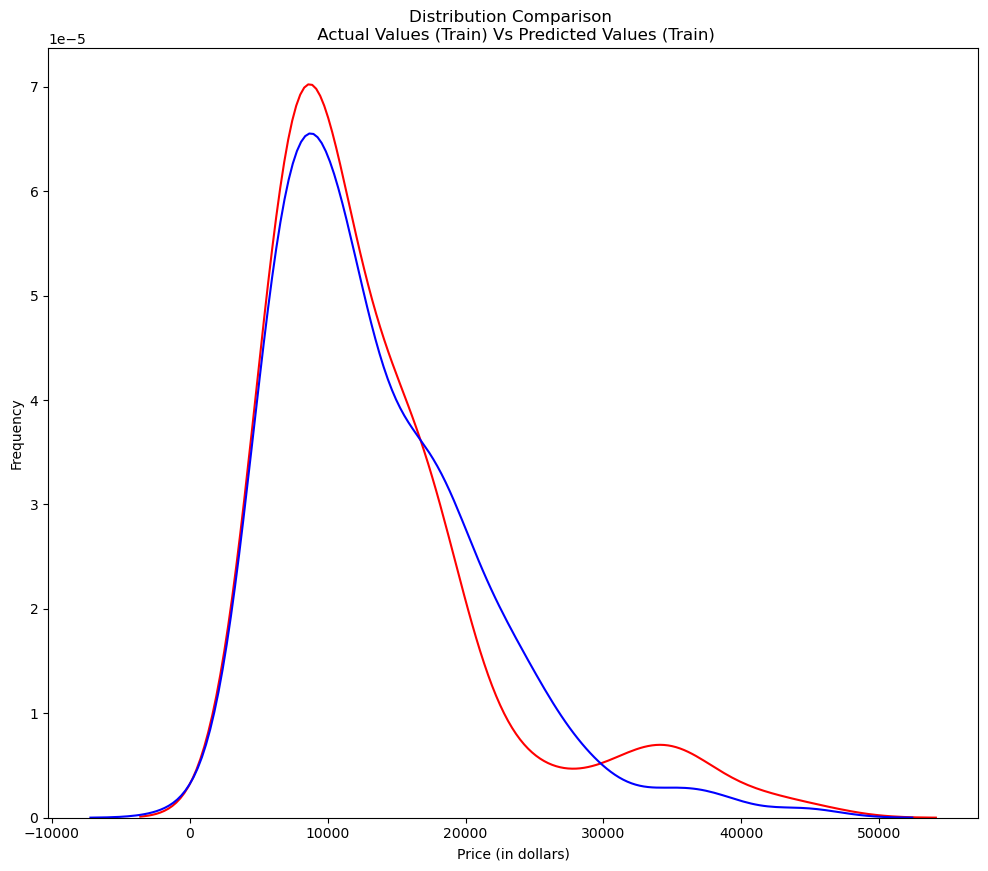

In [214]:
# using training data:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.kdeplot(y_train, color="red", label="Actual Values (Train)")
sns.kdeplot(ypredict_train, color="blue", label="Predicted Values (Train)")

plt.title("Distribution Comparison \n Actual Values (Train) Vs Predicted Values (Train)")
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')
plt.show()
plt.close()

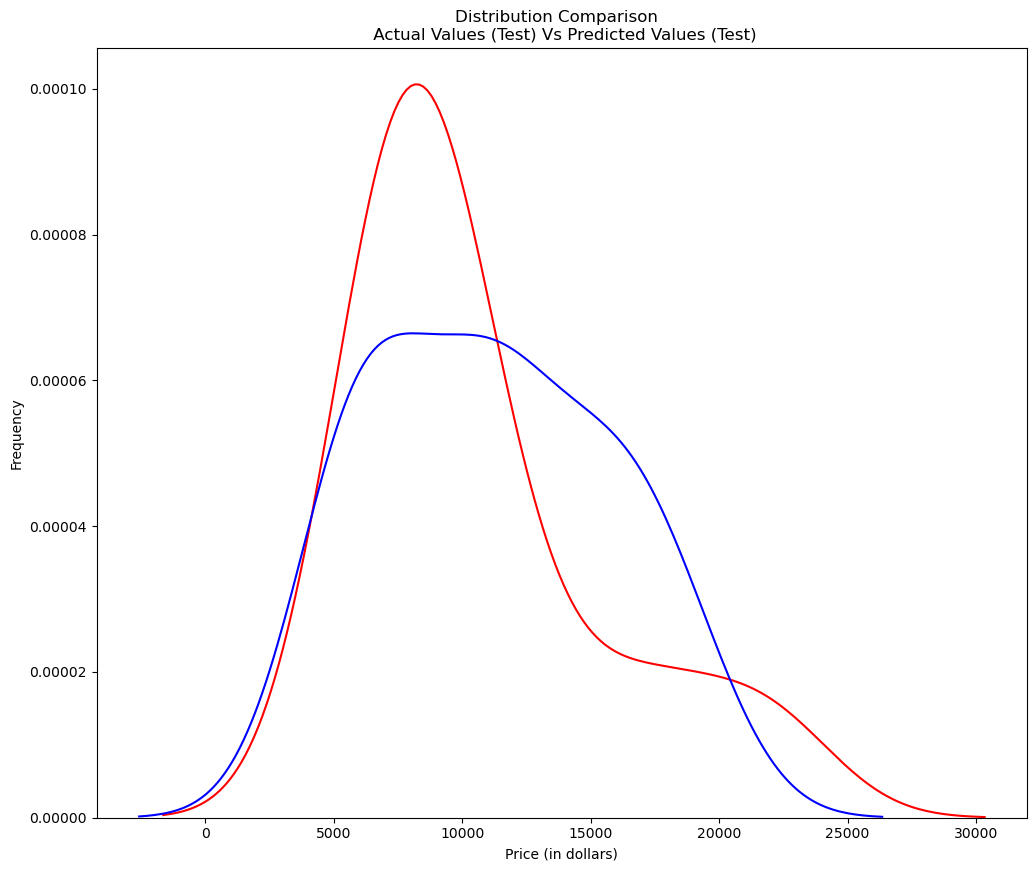

In [215]:
# using test data:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.kdeplot(y_test, color="red", label="Actual Values (Test)")
sns.kdeplot(ypredict_test, color="blue", label="Predicted Values (Test)")

plt.title("Distribution Comparison  \n Actual Values (Test) Vs Predicted Values (Test)")
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')
plt.show()
plt.close()

In [216]:
# Let's create a degree 5 polynomial model.
# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [217]:
# Create a PolynomialFeatures object with a specified degree (in this case, 5) to generate polynomial features from data.
pf=PolynomialFeatures(degree=5)

In [218]:
# Transform training and testing data with these polynomial features. This will create new columns with polynomial combinations of the 'horsepower' feature.
pf_x_train=pf.fit_transform(x_train[['horsepower']])
pf_x_test=pf.fit_transform(x_test[['horsepower']])

In [219]:
# Create a LinearRegression model.
poly = LinearRegression()

In [220]:
# Fit the polynomial features of training data to the linear regression model.
poly.fit(pf_x_train, y_train)

LinearRegression()

In [221]:
# Use the trained model to make predictions on the polynomial features of test data.
y_predict_poly=poly.predict(pf_x_test)
y_predict_poly[0:5]

array([ 6727.5684937 ,  7306.69841686, 12213.71328834, 18895.0377327 ,
       19996.83929633])

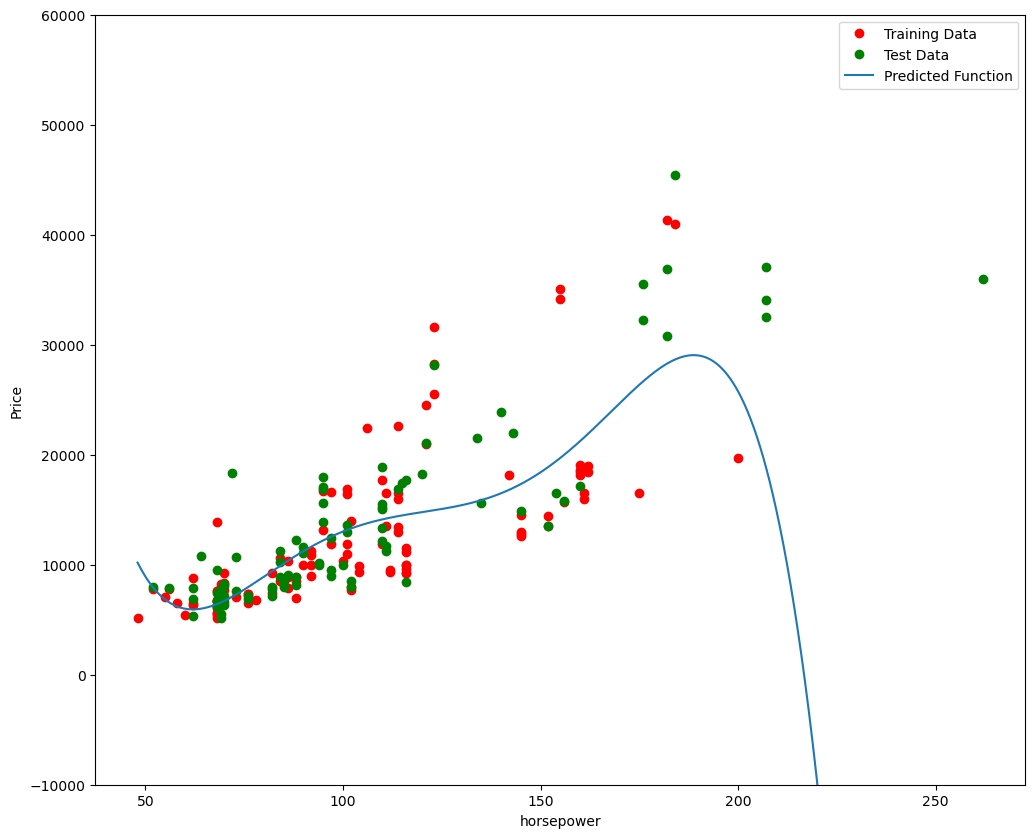

In [222]:
# Display the training data, testing data, and the predicted function.
# we call the fct : PollyPlot([x_train, x_test, y_train, y_test, poly, pf) or:

width = 12
height = 10
plt.figure(figsize=(width, height)) 
xmax=max([x_train['horsepower'].values.max(), x_test['horsepower'].values.max()])
xmin=min([x_train['horsepower'].values.min(), x_test['horsepower'].values.min()])
# Determine the range for the x-axis based on the data
x=np.arange(xmin, xmax, 0.1)
# Plot the training data as red circles ('ro')
plt.plot(x_train['horsepower'], y_train, 'ro', label='Training Data')
# Plot the test data as green circles ('go')
plt.plot(x_test['horsepower'], y_test, 'go', label='Test Data')
# Plot the predicted function based on polynomial regression
# The polynomial regression model is 'poly', and 'pf' is the PolynomialFeatures object
# The 'pf.fit_transform' method transforms the 'x' values
plt.plot(x, poly.predict(pf.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
plt.ylim([-10000, 60000])
plt.xlabel('horsepower')
plt.ylabel('Price')
plt.legend()

In [223]:
# we calculate the R^2 on the training data:
R_square = poly.score(pf_x_train, y_train)
print(f'The R-square is: {R_square}')

The R-square is: 0.5568527854053474


Text(0.5, 1.0, 'R^2 Using Test Data')

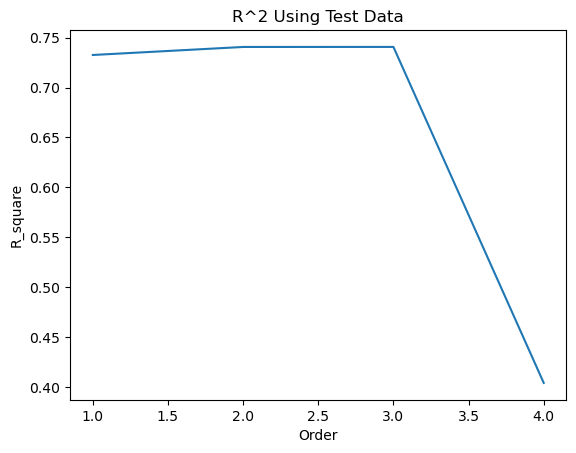

In [224]:
# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

order = [1,2,3,4]
R_square_test=[]
for i in order:
    pf=PolynomialFeatures(degree=i)
    pf_x_train=pf.fit_transform(x_train[['horsepower']])
    pf_x_test=pf.fit_transform(x_test[['horsepower']])
    poly.fit(pf_x_train, y_train)
    R_square_test.append(poly.score(pf_x_test, y_test))
    
plt.plot(order,R_square_test)
plt.xlabel('Order')
plt.ylabel('R_square')
plt.title('R^2 Using Test Data')

In [225]:
def f(order, test_size_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_size_data, random_state=0)
    # Create polynomial features
    pf = PolynomialFeatures(degree=order)
    x_train_pf = pf.fit_transform(x_train[['horsepower']])
    x_test_pf = pf.fit_transform(x_test[['horsepower']])
    # Create a linear regression model and fit it to the training data
    poly = LinearRegression()
    poly.fit(x_train_pf,y_train)
    
    width = 12
    height = 10
    plt.figure(figsize=(width, height)) 
    xmax=max([x_train['horsepower'].values.max(), x_test['horsepower'].values.max()])
    xmin=min([x_train['horsepower'].values.min(), x_test['horsepower'].values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(x_train['horsepower'], y_train, 'ro', label='Training Data')
    plt.plot(x_test['horsepower'], y_test, 'go', label='Test Data')
    plt.plot(x, poly.predict(pf.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.xlabel('horsepower')
    plt.ylabel('Price')
    plt.legend()
    
interact(f, order=(0, 6, 1),  test_size_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_size_data)>

In [226]:
pf=PolynomialFeatures(degree=2)
x_train_pf=pf.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pf=pf.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [227]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pf, y_train)

Ridge(alpha=1)

In [228]:
y_predict = RigeModel.predict(x_test_pf)
print('predicted:', y_predict[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6572.19586866  9634.40697747 20948.17104272 19403.38016094]
test set : [ 6295. 10698. 13860. 13499.]


100%|██████████| 1000/1000 [00:07<00:00, 136.80it/s, Test Score=0.564, Train Score=0.859]


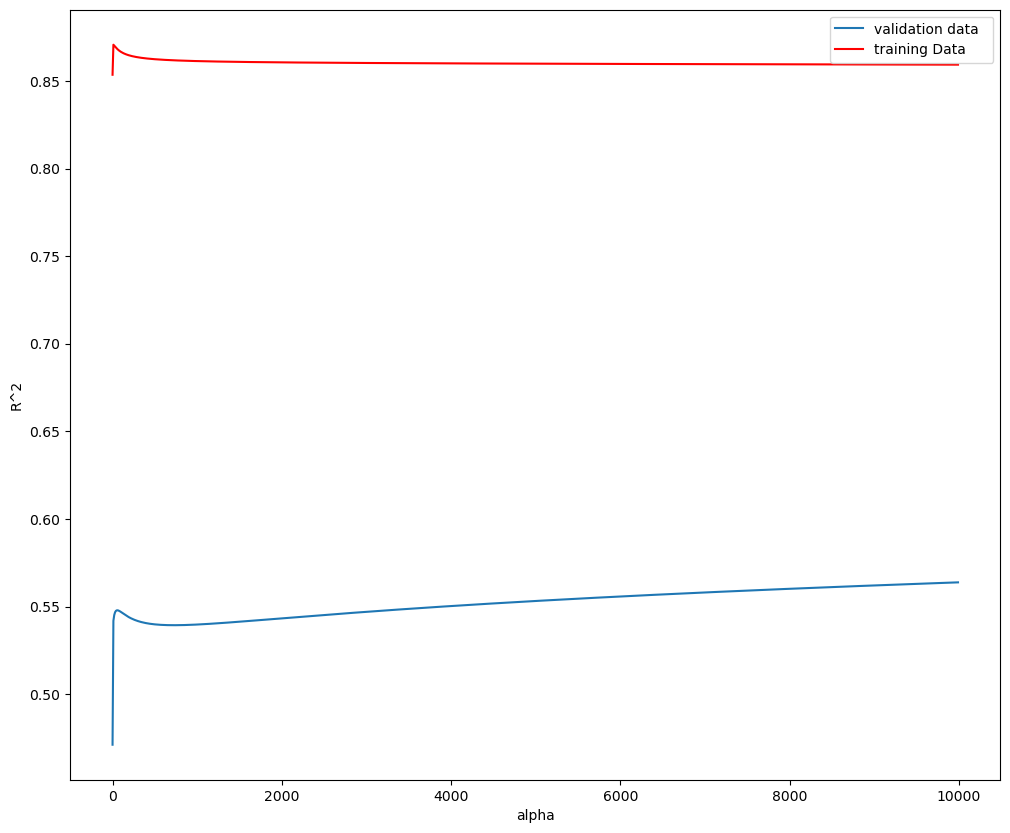

In [229]:
# Import the tqdm library, which provides a progress bar for loops.

Rsqu_test = []
Rsqu_train = []

# Create an array of alpha values ranging from 0 to 9990 with a step size of 10.
Alpha = 10 * np.array(range(0,1000))
# Initialize a progress bar (pbar) using tqdm with the alpha values as the iterable.
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pf, y_train)
    test_score, train_score = RigeModel.score(x_test_pf, y_test), RigeModel.score(x_train_pf, y_train)
    # Update the progress bar with additional information, including the current test and training scores.
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
    
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [230]:
# 4- Grid search
# The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
# We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [231]:
RR=Ridge()
RR

Ridge()

In [232]:
#Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [233]:
#Fit the model:
Grid1.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [234]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [235]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7723083043430523